**Part 1: Housing Prices**

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as mod
import statsmodels
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from pandas.api.types import is_numeric_dtype
warnings.filterwarnings("ignore")

In [2]:
train = pandas.read_csv('train.csv')
test = pandas.read_csv('test.csv')
train = train[["OverallCond", "OverallQual", "SaleCondition", "LotArea", "Neighborhood", "YearBuilt", "YearRemodAdd", "MasVnrArea","BsmtFinSF1","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","HalfBath","GarageArea", "SalePrice"]]
test = test[["OverallCond", "OverallQual", "SaleCondition", "LotArea", "Neighborhood", "YearBuilt", "YearRemodAdd", "MasVnrArea","BsmtFinSF1","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","HalfBath","GarageArea"]]
concat = pandas.concat([train,test], ignore_index=True)

*2: Give 3 examples of continuous and categorical features in the dataset. Choose one feature of each type and plot the histogram to illustrate the distribution.*

Continuous:
- LotFrontage - linear feet of street connected to property
- LotArea - lot size in square feet
- MasVnrArea - masonry veneer area in square feet

Categorical:
- MSZoning - identifies the general zoning classification of the sale.
- MSSubClass - identifies the type of dwelling involved in the sale.
- Sale Condition - type of road access to property



(array([2.750e+02, 1.016e+03, 1.200e+02, 2.500e+01, 6.000e+00, 5.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([    0.,  7000., 14000., 21000., 28000., 35000., 42000., 49000.,
        56000., 63000., 70000.]),
 <a list of 10 Patch objects>)

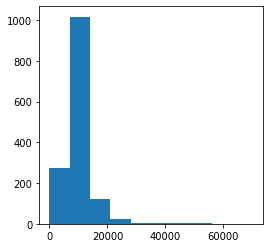

In [3]:
plt.figure(figsize=(4,4))
plt.hist(train['LotArea'], range=(0,70000)) #Plot LotFrontage histogram

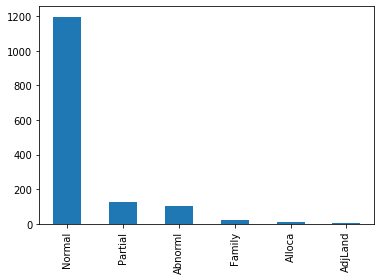

In [4]:
train['SaleCondition'].value_counts().plot(kind='bar') #Plot SaleCondition Histogram as Bar Chart

3: Pre-process data -- deal with missing values, normalize numerical values, and deal with categorical values. Data pre-processing for this Housing Dataset consists of three steps: filling in missing values, normalizing numerical values, and dealing with categorical values. 


<font size="5">Fill in Missing Values, Normalization, One-Hot Coding </font>

In [5]:
for colName, colData in concat.iteritems():
    if colName != "SalePrice":
        if is_numeric_dtype(concat[colName]):
            mean = train[colName].mean()
            concat[colName].fillna(mean, inplace = True)
        else:
            print(colName)
            temp = pandas.get_dummies(concat[colName], prefix=colName, drop_first=True)
            concat = pandas.merge(left=concat,right=temp, left_index=True, right_index=True)
            concat = concat.drop(columns=colName)
train = concat.loc[concat["SalePrice"].notna()]     
test = concat.loc[concat["SalePrice"].isna()]

Neighborhood
SaleCondition


In [6]:
print(train.columns)

Index(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'FullBath', 'GarageArea',
       'GrLivArea', 'HalfBath', 'LotArea', 'MasVnrArea', 'OverallCond',
       'OverallQual', 'SalePrice', 'YearBuilt', 'YearRemodAdd',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')


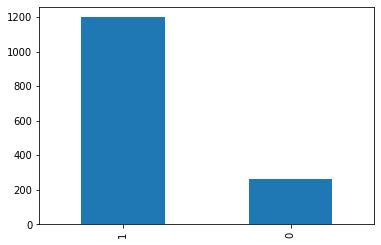

In [7]:
train['SaleCondition_Normal'].value_counts().plot(kind='bar')
#train['SaleCondition_Normal'].value_counts().plot(kind='bar')
#train['SaleCondition_Alloca'].value_counts().plot(kind='bar')
#train['SaleCondition_Family'].value_counts().plot(kind='bar')
#train['SaleCondition_Partial'].value_counts().plot(kind='bar')

In [8]:
y_train = train["SalePrice"]
X_train = train.drop(["SalePrice"], axis = 1)
X_test = test.drop(["SalePrice"], axis = 1)
X_train["one"] = 1
X_test["one"] = 1

In [9]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pandas.DataFrame(data=theta_best[np.newaxis, :], columns=X_train.columns)
theta_best_df

,1stFlrSF,2ndFlrSF,BsmtFinSF1,FullBath,GarageArea,GrLivArea,HalfBath,LotArea,MasVnrArea,OverallCond,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,one
0,27.064161,9.010377,16.935879,1597.742834,27.233125,32.67116,3640.795463,0.51958,15.917188,6133.087692,...,13228.68346,60956.225071,14715.496681,32471.385643,14272.483161,-2357.920544,-4458.393486,6198.567817,25911.676386,-783553.300968


In [10]:
y_pred = X_test.dot(theta_best)

In [11]:
y_pred.head()

1460    125286.860360
1461    168078.312478
1462    176878.606803
1463    191928.014531
1464    249785.755023
dtype: float64

**Part 2: Titanic Data**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as mod
import statsmodels
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from pandas.api.types import is_numeric_dtype
warnings.filterwarnings("ignore")

In [13]:
train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test_titanic.csv")

In [14]:
train = train.drop(["Cabin"], axis=1)
test = test.drop(["Cabin"], axis=1)

In [15]:
train_mean = train["Age"].mean()
train["Age"].fillna(train_mean, inplace = True)
test_mean = test["Age"].mean()
test["Age"].fillna(test_mean, inplace = True)

In [16]:
train["Sex"] = train["Sex"].replace(["male","female"], [1,0])
test["Sex"] = test["Sex"].replace(["male","female"], [1,0])

In [17]:
X_train = train[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
y_train = train["Survived"]
X_test = test[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch"]]

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [19]:
clf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

**Part 3b: MSE and MAE**

In [20]:
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor

In [21]:
X = np.array([[-1,1],[-1,1],[0,1],[0,1],[0,1],[1,1],[1,1]]) #x-values plus constant column (1)
y = np.array([-1,0,-1,0,1,0,1])
y = y.reshape(-1,1)

In [22]:
#Compute the parameters theta using OLS
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [23]:
theta_best

array([[0.5],
       [0. ]])

In [24]:
regr2 = SGDRegressor(loss="epsilon_insensitive", epsilon=0)
regr2.fit(X,y)
y_pred2 = regr2.predict(X)